# KERAS IMAGE CLASSIFICATION VS TRANSFER LEARINING


## (A.) KERAS IMAGE CLASSIFICATION

### 1. IMPORT LIBRARIES

In [5]:
# PACKAGES NEEDED:
# keras,numpy

import numpy as np

import tensorflow as tf
import os
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.layers.convolutional import Conv2D # to add convolutional layers
from keras.layers.convolutional import MaxPooling2D # to add pooling layers
from keras.layers import Flatten # to flatten data for fully connected layers

from keras.layers import Dense, Dropout, Activation, Flatten

import matplotlib.pyplot as plt


### 2. LOAD IMAGE DIRECTORIES AND GENERATE TRAINING AND TESTING IMAGE DATASET  

In [3]:

# getting data
base_dir ='C:/Users/admin/Desktop/1.TOTORIAL/IBM PRACTICE/projects/Comparing frameworks'

#Train directory
train_dir = os.path.join(base_dir, 'train2')

#Testdirectory
test_dir=os.path.join(base_dir, 'test2')
                         

#train
train_cats = os.path.join(train_dir, 'apple')
train_dogs = os.path.join(train_dir, 'banana')

#test 
test_cats = os.path.join(test_dir, 'apple')
test_dogs = os.path.join(test_dir, 'banana')

#train
num_cats_tr = len(os.listdir(train_cats))
num_dogs_tr = len(os.listdir(train_dogs))

#test
num_cats_ts = len(os.listdir(test_cats))
num_dogs_ts = len(os.listdir(test_dogs))

#train
total_train = num_cats_tr + num_dogs_tr

#test
total_test = num_cats_ts + num_dogs_ts


#batchsixe
BATCH_SIZE = 32
IMG_SHAPE = 150 # square image


#generators for generating dataset

#prevent memorization
train_image_generator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

#test dataset rescale
test_image_generator = ImageDataGenerator(
    rescale=1./255)


#train dataset
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

#test dataset
test_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=test_dir,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')



Found 130 images belonging to 2 classes.
Found 37 images belonging to 2 classes.


## 3. PLOT SOME IMAGES

C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


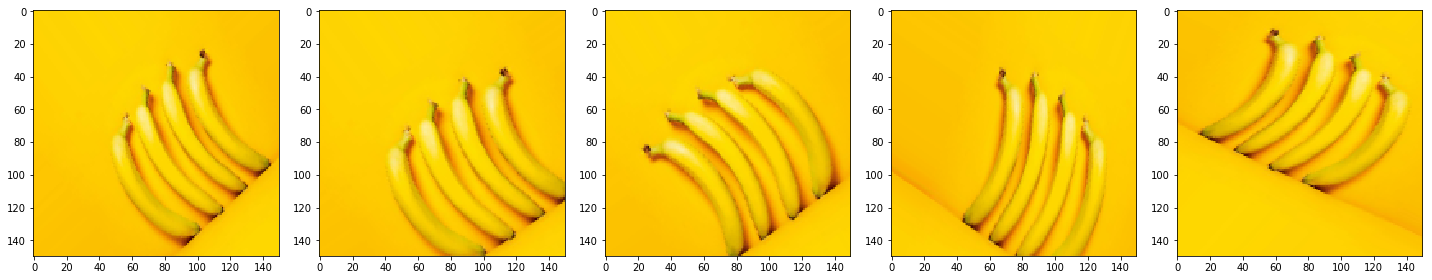

In [6]:

# for plotting images (optional)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    


images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(images)



## 4. TRAIN AND EVALUATE ON TEST/VALIDATION DATASET AND SAVE MODEL

In [8]:
# model

#Keral deep neural network with 3 hidden layers

model = keras.models.Sequential([
    #input
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)), # RGB
    keras.layers.MaxPooling2D(2,2),
    
    #1st hidden layer
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    #2nd hidden layer
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    #3rd hidden layer
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),
    
    #4th  layer (dropout)
    keras.layers.Dropout(0.5), # 1/2 of neurons will be turned off randomly
    
    # 5th layer (flatten)
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    
    #output layer
    keras.layers.Dense(2, activation='softmax') #[0, 1] or [1, 0]
    
    ])


model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

#training epechs
EPOCHS = 5

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=test_data_gen,
    validation_steps=int(np.ceil(total_test / float(BATCH_SIZE))),
    )

#save model

model.save("applbananapredictionreal")

W0820 17:08:24.347172  6632 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:66: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0820 17:08:24.463207  6632 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:541: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0820 17:08:24.475210  6632 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4432: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0820 17:08:24.641417  6632 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4267: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0820 17:08:24.801973  6632 deprecation_wrapper.py:119] From C:\ProgramData\Ana

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)      

W0820 17:08:25.807324  6632 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/5


C:\ProgramData\Anaconda3\lib\site-packages\PIL\Image.py:968: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  ' expressed in bytes should be converted ' +


5/5 [==============================] - 19s 4s/step - loss: 1.1438 - acc: 0.6236 - val_loss: 0.6654 - val_acc: 0.5135
Epoch 2/5
5/5 [==============================] - 12s 2s/step - loss: 0.7219 - acc: 0.4284 - val_loss: 0.5570 - val_acc: 0.5135
Epoch 3/5
5/5 [==============================] - 12s 2s/step - loss: 0.4743 - acc: 0.7791 - val_loss: 0.5019 - val_acc: 0.9459
Epoch 4/5
5/5 [==============================] - 11s 2s/step - loss: 0.3408 - acc: 0.9481 - val_loss: 0.5892 - val_acc: 0.9189
Epoch 5/5
5/5 [==============================] - 11s 2s/step - loss: 0.2529 - acc: 0.9286 - val_loss: 0.5989 - val_acc: 0.9189


## 5. Predict on test dataset eg  like an external image

In [9]:
## Predict on test dataset
# Predict from generator 

#load a second test directory to test on external images
test_dir2=os.path.join(base_dir, 'test3')

#generator for test data
test_data_gen2 = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=test_dir2,
                                                           shuffle=False,
                                                           target_size=(IMG_SHAPE, IMG_SHAPE),
                                                           class_mode='binary')

#load model
model = tf.keras.models.load_model("applbananapredictionreal")

pred=model.predict_generator(test_data_gen2, steps=len(test_data_gen2), verbose=1)

Found 2 images belonging to 2 classes.
1/1 [==============================] - 0s 230ms/step


In [10]:
#label of Prediction
#1= appple
#0= banana
# Get classes by np.round
cl = np.round(pred)
cl


array([[1., 0.],
       [0., 1.]], dtype=float32)

#### it correctly predicted the images as 1=apple and 0 = banana

## (B) TRANSFER LEARNING WITH IBM

### i built a custom classifier using ibm cloud gui , link : https://www.ibm.com/cloud/watson-visual-recognition
### you can also do this using an api

### 1 #Using the default model i built on ibm watson gui to classify cat and dog images

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: DeprecationWarning: watson-developer-cloud moved to ibm-watson. To get updates, use the new package.


(312, 355)


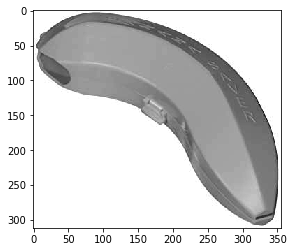

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "DefaultCustomModel_1522079957",
          "name": "Default Custom Model",
          "classes": [
            {
              "class": "banana_positive",
              "score": 0.899
            }
          ]
        }
      ],
      "image": "banana_94.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 2
}
(118, 177)


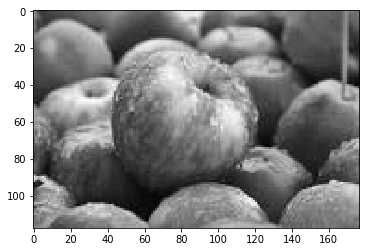

{
  "images": [
    {
      "classifiers": [
        {
          "classifier_id": "DefaultCustomModel_1522079957",
          "name": "Default Custom Model",
          "classes": [
            {
              "class": "apple_positive",
              "score": 0.92
            }
          ]
        }
      ],
      "image": "download app.jpg"
    }
  ],
  "images_processed": 1,
  "custom_classes": 2
}


In [37]:
#TRANSFER LEARNING WITH IBM

#Using the default model i built on ibm watson gui to classify cat and dog images

from watson_developer_cloud import VisualRecognitionV3 
import json
import matplotlib.pyplot as plt
import cv2
import numpy as np
import sys

%matplotlib inline
# creating a VR instance

username = ''
password = ''
version=''

import json
from watson_developer_cloud import VisualRecognitionV3


#import vision api

visual_recognition = VisualRecognitionV3(
   version = version, iam_apikey='')

#TO TEST CLASSIFIER





#plot first image
path = 'C:/Users/admin/Desktop/1.TOTORIAL/IBM PRACTICE/projects/Comparing frameworks/test/banana_94.jpg'



im = cv2.imread(path,0)
h,w = im.shape[:2]
print(im.shape)
plt.imshow(im,cmap='gray')
plt.show()

#predict first image

with open(path, 'rb') as images_file:
    classes = visual_recognition.classify(
        images_file,
        threshold='0.6',
        #the custom model i built on ibm 
        classifier_ids='DefaultCustomModel_1522079957').get_result()

    
    print(json.dumps(classes, indent=2))


    
    
#plot second image



path2='C:/Users/admin/Desktop/1.TOTORIAL/IBM PRACTICE/projects/Comparing frameworks/test/download app.jpg'


im = cv2.imread(path2,0)
h,w = im.shape[:2]
print(im.shape)
plt.imshow(im,cmap='gray')
plt.show()


#predict second image
with open(path2, 'rb') as images_file:
    classes = visual_recognition.classify(
        images_file,
        threshold='0.6',
        #the custom model i built on ibm 
        classifier_ids='DefaultCustomModel_1522079957').get_result()

    
    print(json.dumps(classes, indent=2))

#### this correctly predicted the two images respectively


## 2 OR using an ibm watson api and creating a classifier on your laptop 

In [ ]:
#OR using an ibm watson api and creating a classifier on your laptop 

#create_classifier(self, name, positive_examples, negative_examples=None, negative_examples_filename=None, **kwargs)

import json
from ibm_watson import VisualRecognitionV3
from ibm_cloud_sdk_core.authenticators import IAMAuthenticator

authenticator = IAMAuthenticator('{apikey}')
visual_recognition = VisualRecognitionV3(
    version='2018-03-19',
    authenticator=authenticator
)

visual_recognition.set_service_url('{url}')

with open('./cat.zip', 'rb') as cat, open(
        './dog.zip', 'rb') as dog, open(
            
    model = visual_recognition.create_classifier(
        'dogs',
        positive_examples={'cat': cat, 'dog': dog},
        negative_examples=None).get_result()
print(json.dumps(model, indent=2))